# Pymaceuticals Inc.
---

### Analysis

- Among the four treatment groups, Capomulin and Ramicane stand out as the most effective, consistently showing lower tumor volumes compared to Infubinol and Ceftamin

- The box plot visualization revealed that Infubinol has a significat outlier

- Gender distribution of the mice was almost even, with Male Mice representing 51% and Female Mice representing 49%

- Mice under the Capomulin Treatment show a significat drop off in tumor size after 30 days
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# identify the headers for merging-combo down below
for column in mouse_metadata.columns:
    print(column)

Mouse ID
Drug Regimen
Sex
Age_months
Weight (g)


In [3]:
# identify the headers for merging-combo down below
for column in study_results.columns:
    print(column)    

Mouse ID
Timepoint
Tumor Volume (mm3)
Metastatic Sites


In [4]:
# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.

num_mice = combined_data["Mouse ID"].nunique()
print("Number of Mice:", num_mice)

Number of Mice: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find the duplicate mice using Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display the duplicate information
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Find the unique "Mouse ID" as per the example results
duplicate_mouse_id = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()

# Test for success
duplicate_mouse_id

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

# Filter the combined_data DataFrame to get all the data for the duplicate Mouse ID 'g989'
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == 'g989']

# Get all the data for the duplicate mouse ID g989
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse 'g989' by its ID
clean_data = combined_data[combined_data["Mouse ID"] != 'g989']

# Drop any rows with duplicate "Mouse ID" and "Timepoint" combinations from the clean DataFrame
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')

# Exclude the 'g989' mouse from the clean DataFrame
clean_data = clean_data[clean_data["Mouse ID"] != 'g989']

# Display the first few rows of the clean DataFrame
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame

num_mice_clean=len(clean_data["Mouse ID"].unique())
print("Number of Mice (cleaned of duplicates): ",num_mice_clean)

Number of Mice (cleaned of duplicates):  248


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})

# Display the Summary Statistics  Table
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the Summary Statistics  Table
summary_stats_agg

# I can't figure out how they get 'Tumor Volume (mm3)' to show at the top :p

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

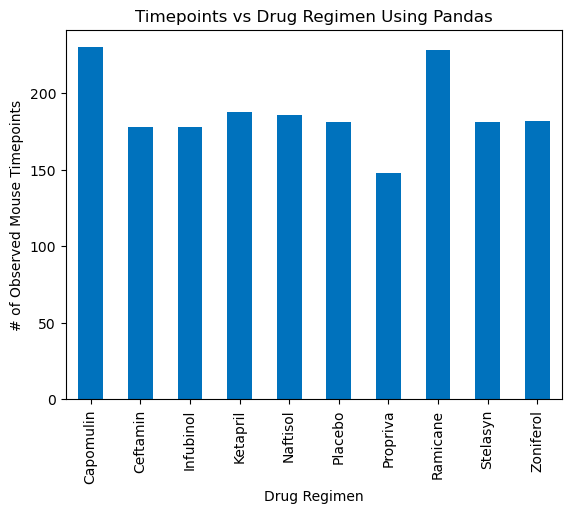

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Use groupby to count the number of rows for each Drug Regimen
rows_per_regimen = clean_data.groupby("Drug Regimen").size()

# Create a bar graph using Pandas plot method
rows_per_regimen.plot(kind='bar', color='#0072BD') 

# Set plot labels
plt.title("Timepoints vs Drug Regimen Using Pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the plot
plt.show()


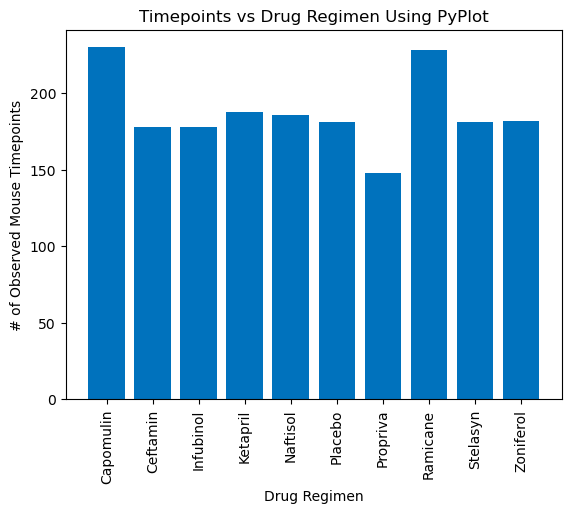

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using PyPlot.

# Use groupby to count the number of rows for each Drug Regimen
rows_per_regimen = clean_data.groupby("Drug Regimen").size()

# Get the drug regimens and the corresponding row counts
drug_regimens = rows_per_regimen.index
row_counts = rows_per_regimen.values

# Create a bar plot using pyplot
plt.bar(drug_regimens, row_counts, color='#0072BD') 

# Set plot labels
plt.title("Timepoints vs Drug Regimen Using PyPlot")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate the x-axis labels for better readability 
plt.xticks(rotation=90, ha='center')

# Show the plot
plt.show()

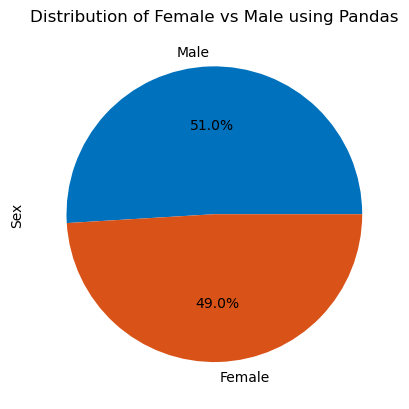

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of mice for each gender
gender_distribution_pd = clean_data["Sex"].value_counts()

# Create a pie plot using Pandas
gender_distribution_pd.plot(kind='pie', autopct='%1.1f%%', title="Distribution of Female vs Male using Pandas", colors=['#0072BD','#D95319'])

# Show the plot
plt.show()


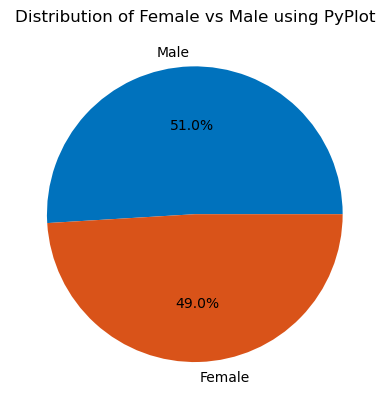

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using PyPlot

# Count the number of mice for each gender
gender_distribution_pp = clean_data["Sex"].value_counts()

# Create a pie plot using pyplot
plt.pie(gender_distribution_pp, labels=gender_distribution_pp.index, autopct='%1.1f%%', colors=['#0072BD','#D95319'])

# Set the title for the pie plot
plt.title('Distribution of Female vs Male using PyPlot')


# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# List of the four treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints_idx = clean_data.groupby("Mouse ID")["Timepoint"].idxmax()

# test for success
last_timepoints_idx


Mouse ID
a203    1804
a251    1786
a262    1783
a275    1856
a366    1401
        ... 
z435     499
z578    1799
z581    1784
z795    1887
z969    1869
Name: Timepoint, Length: 248, dtype: int64

In [18]:
# Create a DataFrame with the last timepoints
last_timepoints_df = clean_data.loc[last_timepoints_idx, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Test for success
last_timepoints_df

,Mouse ID,Timepoint,Tumor Volume (mm3)
1804,a203,45,67.973419
1786,a251,45,65.525743
1783,a262,45,70.717621
1856,a275,45,62.999356
1401,a366,30,63.440686
...,...,...,...
499,z435,10,48.710661
1799,z578,45,30.638696
1784,z581,45,62.754451
1887,z795,45,65.741070


In [19]:
# Merge the new DataFrame with the clean DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints_df, clean_data, on=["Mouse ID", "Timepoint", "Tumor Volume (mm3)"], how="left")

# Test for success
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [20]:
# Filter the DataFrame to include only the desired treatment regimens
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_regimens)]

# Test for success
final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [21]:
# Print  the final DataFrame with the tumor volume at the last timepoint for each mouse
print(final_tumor_volume[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]])

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
238     y769     Ceftamin           68.594745
239     y793    Capomulin           31.896238
240     y865     Ceftamin           64.729837
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [23]:
# Calculate the IQR for each treatment regimen


# Create an empty dictionary to store tumor volumes for each regimen
tumor_volumes_per_regimen = {}

# Populate the dictionary with tumor volumes for each regimen
for regimen in treatment_regimens:
    tumor_volumes = final_tumor_volume[final_tumor_volume["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]
    tumor_volumes_per_regimen[regimen] = tumor_volumes.tolist()

# Calculate the IQR for each treatment regimen
for regimen, tumor_volumes in tumor_volumes_per_regimen.items():
    quartiles = pd.Series(tumor_volumes).quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    print(f"----- {regimen} -----")
    print(f"Lower Quartile (Q1): {lower_q:.2f}")
    print(f"Upper Quartile (Q3): {upper_q:.2f}")
    print(f"Interquartile Range (IQR): {iqr:.2f}")

    # Determine potential outliers using the IQR rule    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds    
    potential_outliers = [vol for vol in tumor_volumes if vol < lower_bound or vol > upper_bound]
    if not potential_outliers:
        print("No potential outliers.")
    else:
        print("Potential outliers:")
        print(potential_outliers)

    print("--------------------")

    # Create a subset DataFrame that includes potential outliers    
    subset_outliers = final_tumor_volume[
        (final_tumor_volume["Drug Regimen"] == regimen) & 
        (final_tumor_volume["Tumor Volume (mm3)"].isin(potential_outliers))
    ]
    
    # Test for success 
    print(f"Subset DataFrame with potential outliers for {regimen}:")
    print(subset_outliers[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]])

----- Capomulin -----
Lower Quartile (Q1): 32.38
Upper Quartile (Q3): 40.16
Interquartile Range (IQR): 7.78
No potential outliers.
--------------------
Subset DataFrame with potential outliers for Capomulin:
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []
----- Ramicane -----
Lower Quartile (Q1): 31.56
Upper Quartile (Q3): 40.66
Interquartile Range (IQR): 9.10
No potential outliers.
--------------------
Subset DataFrame with potential outliers for Ramicane:
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []
----- Infubinol -----
Lower Quartile (Q1): 54.05
Upper Quartile (Q3): 65.53
Interquartile Range (IQR): 11.48
Potential outliers:
[36.3213458]
--------------------
Subset DataFrame with potential outliers for Infubinol:
   Mouse ID Drug Regimen  Tumor Volume (mm3)
31     c326    Infubinol           36.321346
----- Ceftamin -----
Lower Quartile (Q1): 48.72
Upper Quartile (Q3): 64.30
Interquartile Range (IQR): 15.58
No potent

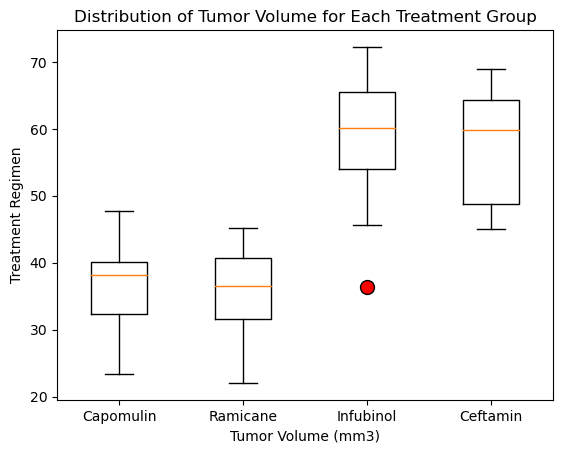

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# List of the four treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Tumor volume data for each treatment group
tumor_volumes_by_regimen = [final_tumor_volume[final_tumor_volume["Drug Regimen"] == regimen]["Tumor Volume (mm3)"] for regimen in treatment_regimens]

# Custom marker style and color, thanks to TA Sam in Office Hours
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)

# Print box plot using PyPlot
plt.boxplot(tumor_volumes_by_regimen, labels=treatment_regimens, flierprops=flierprops)

# Title and Lables
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Treatment Regimen')

# Show the plot
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for Capomulin treatment
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Get the list of mice treated with Capomulin
mice_with_capomulin = capomulin_data["Mouse ID"].unique()

# Print the list of the mice
print(mice_with_capomulin)


['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


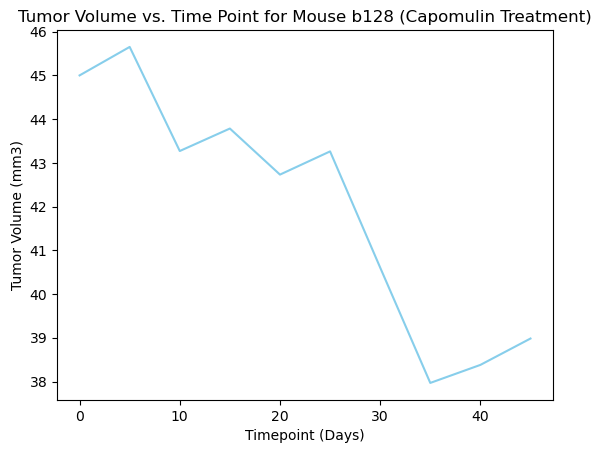

In [29]:
# Choose a single mouse treated with Capomulin
mouse_id = "b128"

# Filter the data for the chosen mouse and Capomulin treatment
capomulin_mouse_data = clean_data[(clean_data["Mouse ID"] == mouse_id) & (clean_data["Drug Regimen"] == "Capomulin")]

# Create the line plot
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], color='skyblue')

# Title and Lables
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

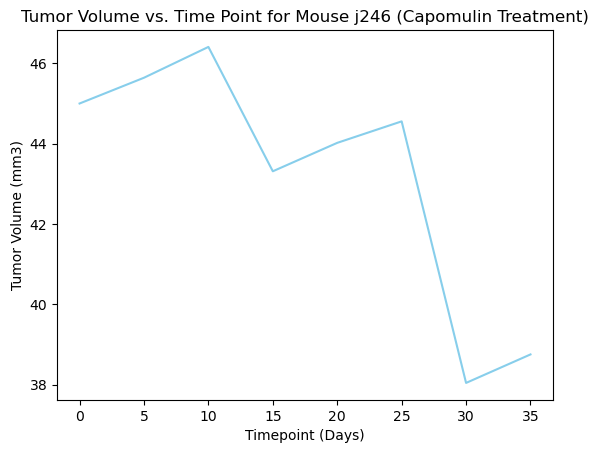

In [26]:
# Choose a single mouse treated with Capomulin - SECOND MOUSE DEBUGG & ANALYSYS
mouse_id2 = "j246"

# Filter the data for the chosen mouse and Capomulin treatment
capomulin_mouse_data = clean_data[(clean_data["Mouse ID"] == mouse_id2) & (clean_data["Drug Regimen"] == "Capomulin")]

# Create the line plot
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], color='skyblue')

# Title and Lables
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id2} (Capomulin Treatment)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

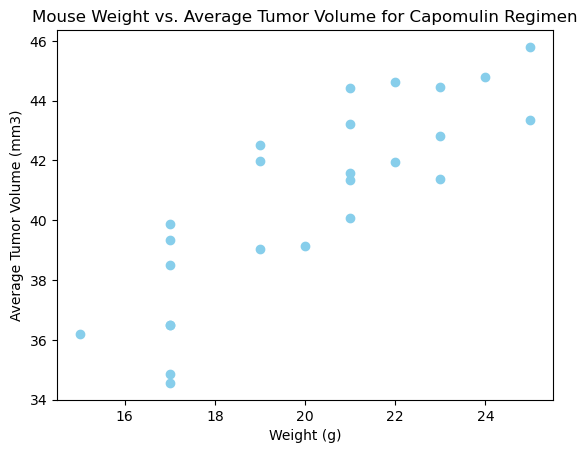

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group the filtered data by "Mouse ID" and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights for the Capomulin-treated mice
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='skyblue')

# Title and Lables
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


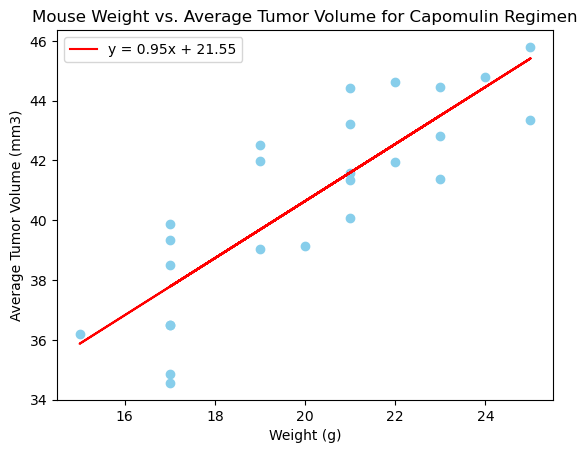

The correlation between mouse weight and the average tumor volume is 0.84


In [28]:
# Group the filtered data by "Mouse ID" and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights for the Capomulin-treated mice
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# test for success
# mouse_weights

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(mouse_weights, average_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)

# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='skyblue')

# Add the regression line to the plot
regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color='r', label=f"y = {slope:.2f}x + {intercept:.2f}")

# Title and Lables
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the legend
plt.legend()

# Show the plot
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")